# Leila's Notebook

## My submetric: Dogs!!!!

Everybody loves dogs! Dogs elevate being outside, so I looked at a dataset that looked at how many dogs were in each Pittsburgh neighborhood. By analyzing the amount and type of dogs, it can show what the best neighborhood to enjoy the great outdoors is.

### Setting the dataset up

In [1]:
# importing panda and fpsnippets
import pandas as pd
from fpsnippets import zip_to_neighborhoods
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# importing the data set
dogs_csv = "https://data.wprdc.org/datastore/dump/f8ab32f7-44c7-43ca-98bf-c1b444724598"
dogs_data = pd.read_csv(dogs_csv, encoding="latin1")

In [3]:
# let's look at the dataset
dogs_data.head()

,_id,LicenseType,Breed,Color,DogName,OwnerZip,ExpYear,ValidDate
0,24887215,Dog Lifetime Spayed Female,LABRADOR RETRIEVER,YELLOW,SASHA,15137,2099,2005-01-31T00:00:00
1,24887216,Dog Lifetime Neutered Male,LABRADOR RETRIEVER,BROWN,JAKE,15129,2099,2004-06-21T00:00:00
2,24887217,Dog Lifetime Spayed Female,MIXED,SPOTTED,SHILOH,15129,2099,2006-01-20T00:00:00
3,24887218,Dog Lifetime Spayed Female,LAB MIX,BROWN,BLONDIE,15140,2099,2005-07-18T00:00:00
4,24887219,Dog Lifetime Spayed Female,AUS SHEPHERD,MULTI,SASHA,15238,2099,2004-02-25T00:00:00


In [4]:
# because the location is given in zips, let's add a column called "neighborhoods"
dogs_data["Neighborhoods"] = dogs_data["OwnerZip"].apply(lambda z: zip_to_neighborhoods((str(z))))

In [5]:
# because our dataset has many zips out of the pittsburgh city boundaries, we are saying that 
# we should only look at neighborhoods within the pittsburgh city limit!
def handling_outside_pgh(row):
    if isinstance(row["Neighborhoods"], list) and len(row["Neighborhoods"]) == 0:
        return ["Outside Pittsburgh City boundaries"]
    return row["Neighborhoods"]

dogs_data["Neighborhoods"] = dogs_data.apply(handling_outside_pgh, axis = 1)

## Data

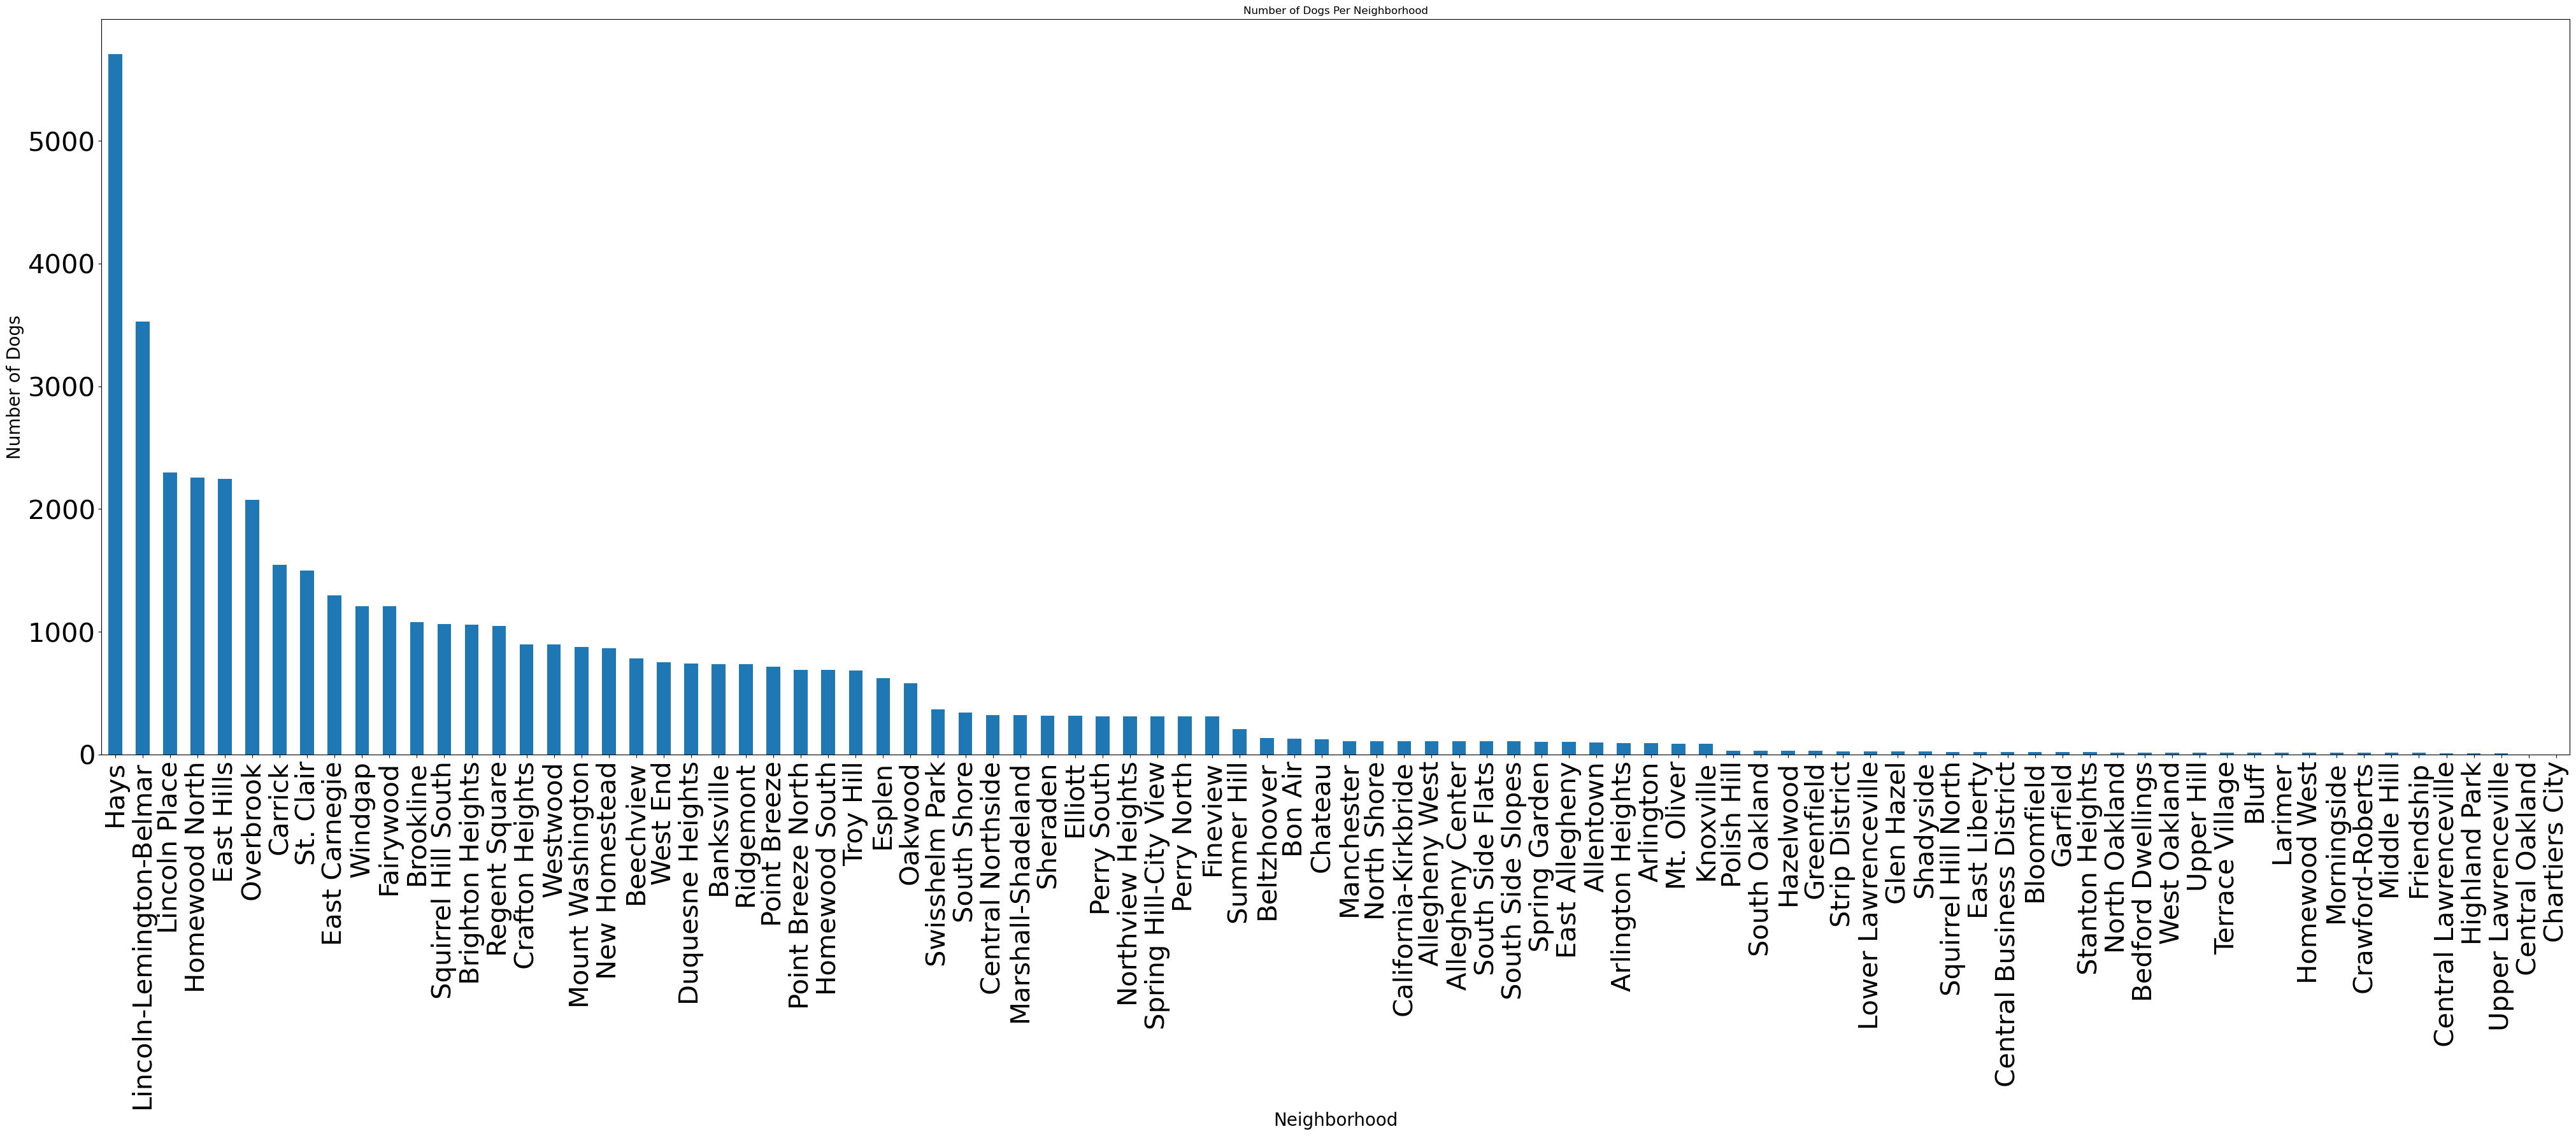

In [7]:
# when we look at our data, though, the bar graph is way too high for the neighborhoods outside of the city of Pittsburgh's limits

# here we remove the "Outside Pittsburgh City Boundaries" into a new dataset so it isn't massively high
filtered_dogs_no_outside_pgh = dogs_data[~dogs_data["Neighborhoods"].apply(lambda x: x == ["Outside Pittsburgh City boundaries"])]

dogs_exploded = filtered_dogs_no_outside_pgh.explode("Neighborhoods")

dogs_exploded["Neighborhoods"].value_counts().sort_values(ascending=False).plot(kind = "bar", rot = 90, figsize = (50,15), title = "Number of Dogs Per Neighborhood")
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlabel("Neighborhood", fontsize=20)
plt.ylabel("Number of Dogs", fontsize=20)
plt.show()

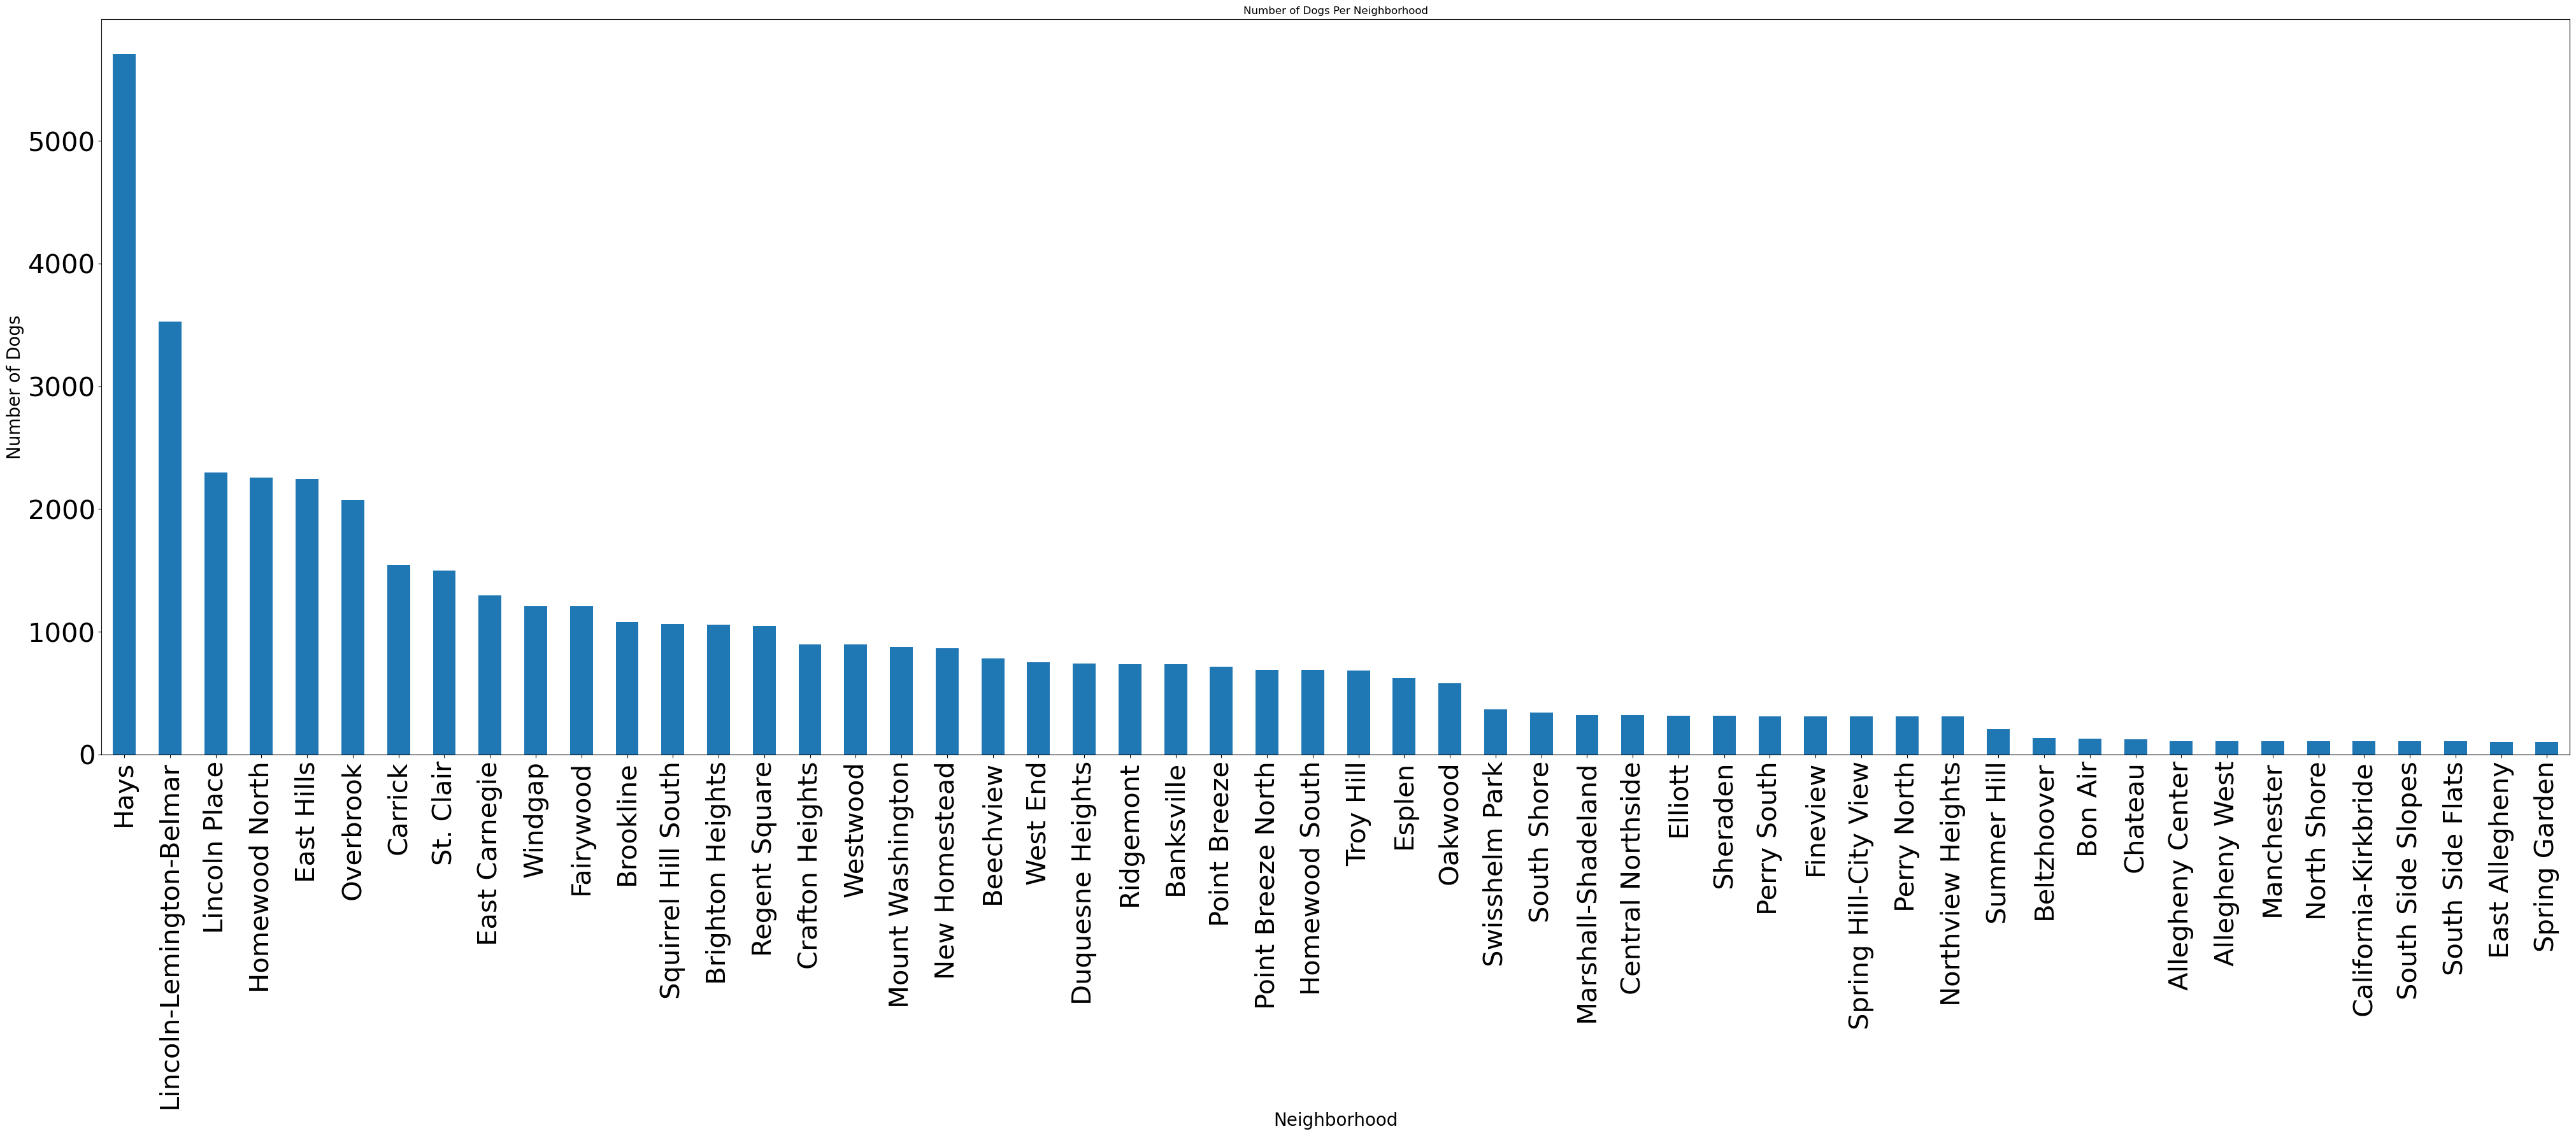

In [8]:
# let's take a closer look at the neighborhoods who have lots of dogs, let's say 100
filtered_dogs_no_outside_pgh = dogs_data[~dogs_data["Neighborhoods"].apply(lambda x: x == ["Outside Pittsburgh City boundaries"])]

dogs_exploded = filtered_dogs_no_outside_pgh.explode("Neighborhoods")

neighborhood_counts = dogs_exploded["Neighborhoods"].value_counts()

only_dogs_with_100 = neighborhood_counts[neighborhood_counts > 100]

only_dogs_with_100.sort_values(ascending=False).plot(kind = "bar", rot = 90, figsize = (50,15), title = "Number of Dogs Per Neighborhood")
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlabel("Neighborhood", fontsize=20)
plt.ylabel("Number of Dogs", fontsize=20)
plt.show()

### The issue with these graphs

The primary issue with these graphs are that neighborhoods like Hays and Lincoln-Lemington-Belmar all cover a wide variety of zip codes, so it's not a great metric of how many dogs. We need to look at the amount of dogs in a different way.

In [9]:
# Now, we all know that all dogs aren't equally as friendly. Some are actually really mean
# We're going to make a points system based on what constitutes a friendly dog. 
# If a neighborhood has lots of unfriendly dogs, they get a lower score

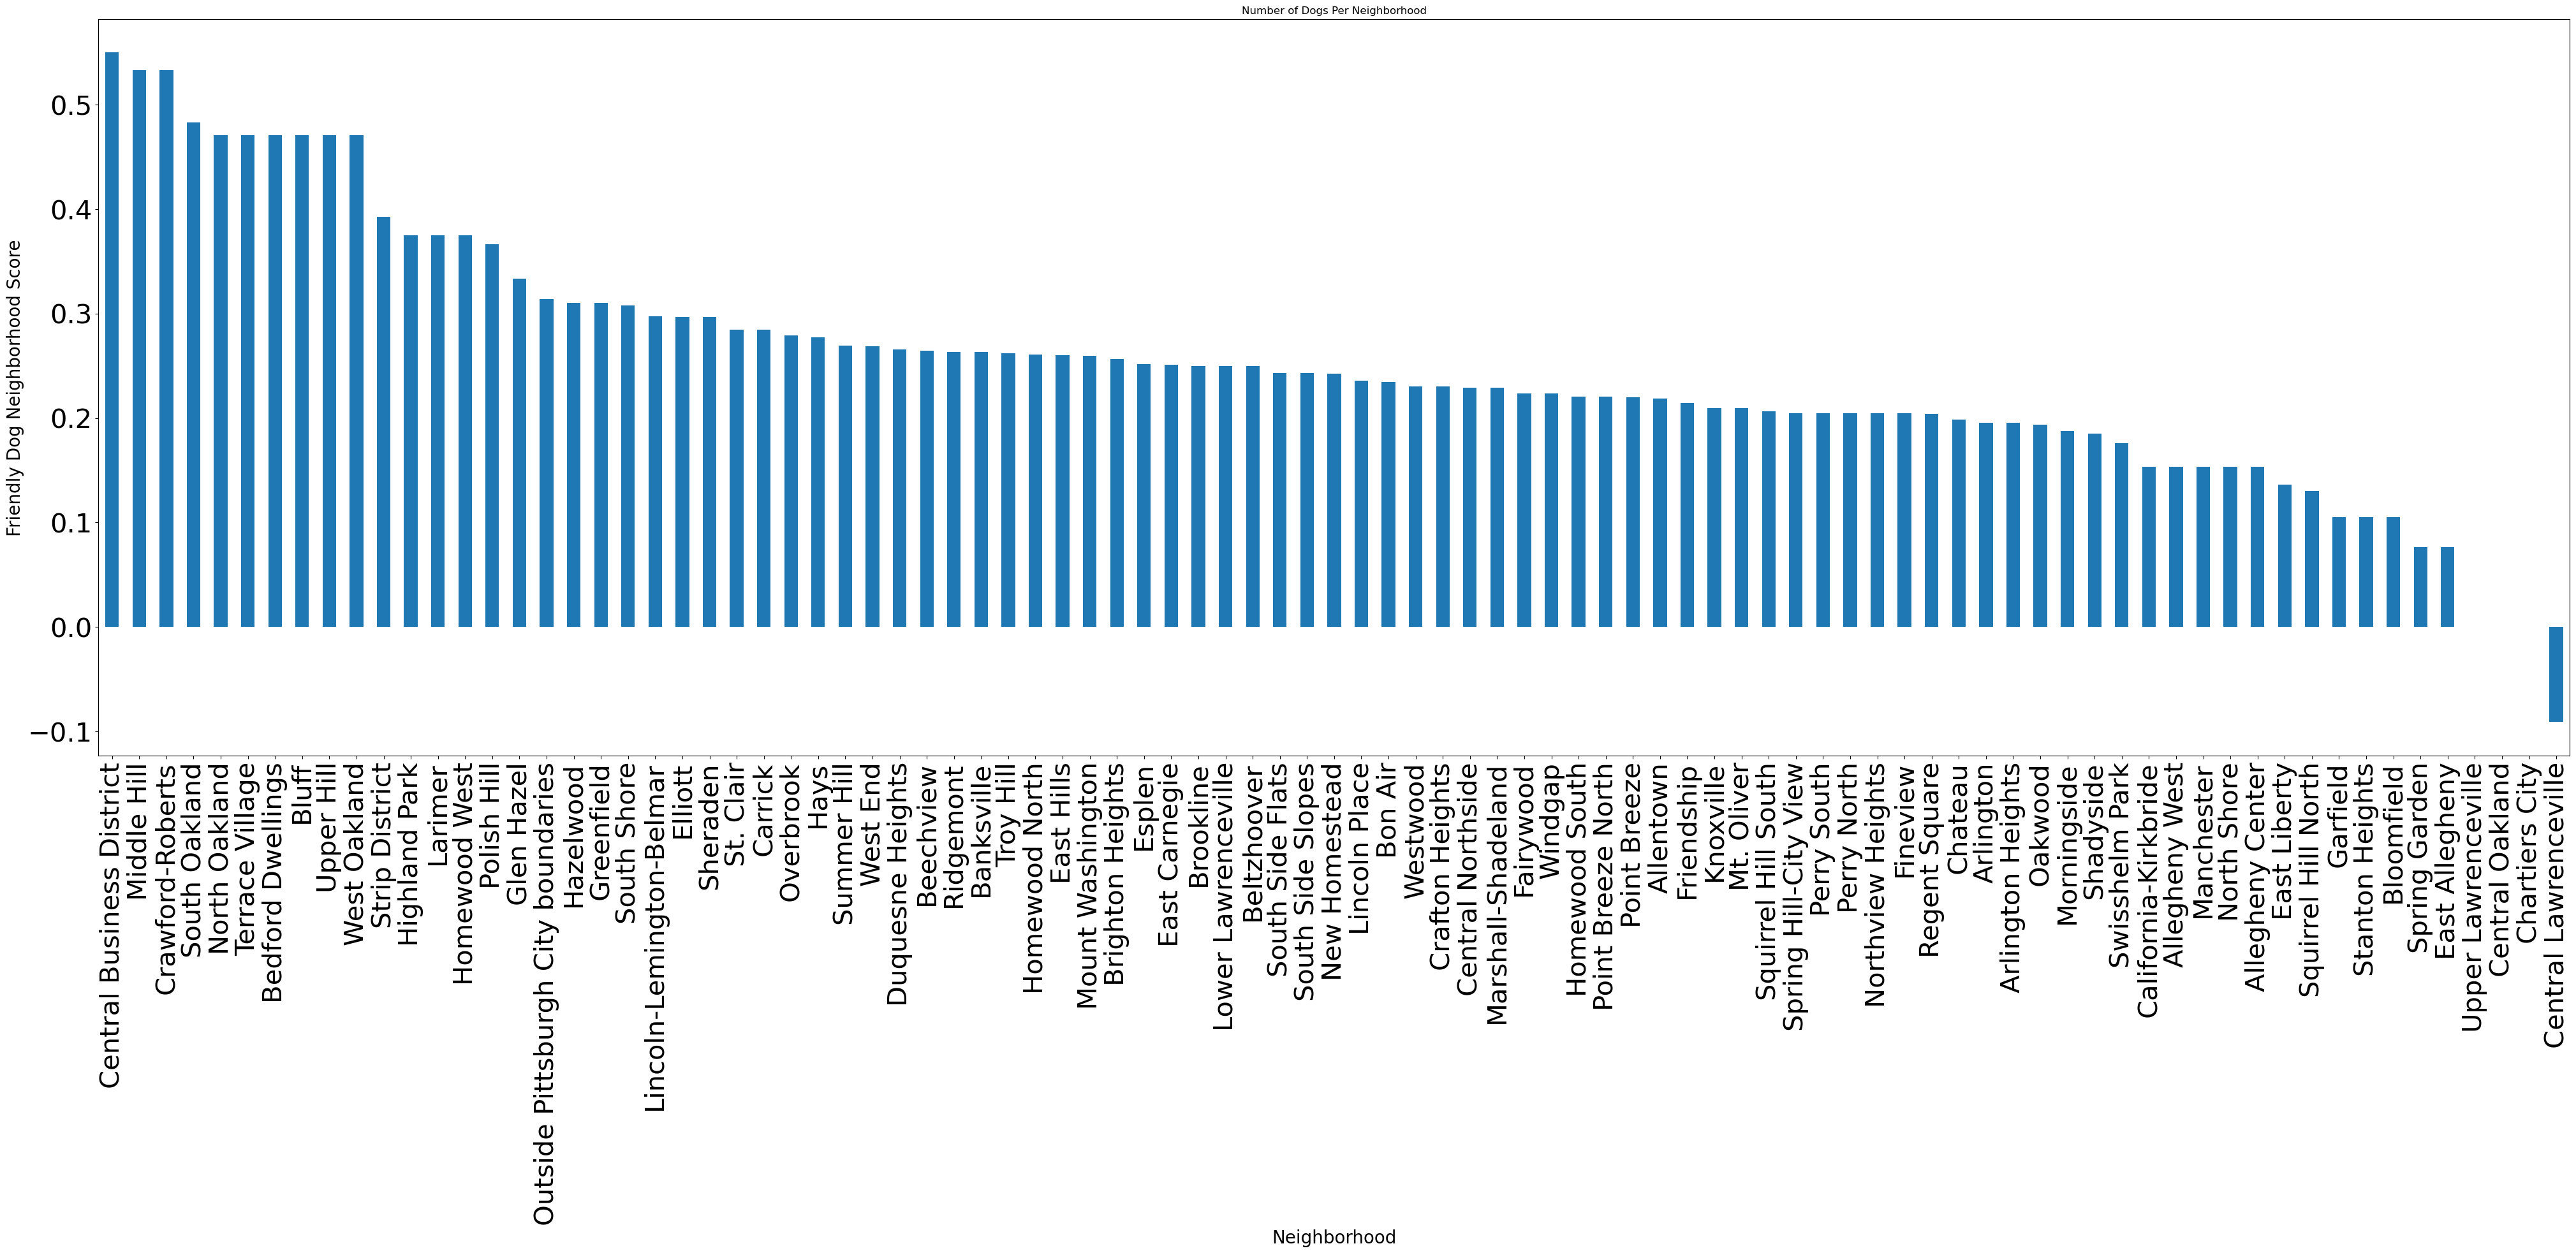

In [10]:
nice_dog_breeds = ["LABRADOR RETRIEVER", "AUS SHEPHERD", "BICHON FRISE", "BRITTANY SPANIEL", "BEAGLE"]

bad_dog_breeds = ["CHIHUAHUA", "PUG", "BOXER"]

def assign_score(breed):
    if breed in nice_dog_breeds:
        return 3
    elif breed in bad_dog_breeds:
        return -1
    else:
        return 0

dogs_data["friendliness_rating"] = dogs_data["Breed"].apply(assign_score)

dogs_exploded = dogs_data.explode("Neighborhoods")

# we're keeping count of how many 
scores_per_neighborhood = dogs_exploded.groupby("Neighborhoods")["friendliness_rating"].sum()
neighborhood_count_of_dogs = dogs_exploded.groupby("Neighborhoods")["Breed"].count()

avg_friendliness_in_neighborhood = scores_per_neighborhood / neighborhood_count_of_dogs

avg_friendliness_in_neighborhood.sort_values(ascending=False).plot(kind = "bar", rot = 90, figsize = (50,15), title = "Number of Dogs Per Neighborhood")
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlabel("Neighborhood", fontsize=20)
plt.ylabel("Friendly Dog Neighborhood Score", fontsize=20)
plt.show()

### Why this way is better
This way allows us to see with a specific metric on what neighborhoods the dogs will provide a benefit to people. Dogs like boxers are known to be aggressive and chihuahuas like to bark, and nobody wants that when going outside. On the other hand, dogs like australian shepards are known to be polite and smart, leading to a more outdoor-friendly neighborhood. This is a better metric of measuring. 

## Conclusion

In conclusion, the central business district (CBD) is the most outdoor-friendly neighborhood in Pittsburgh. The Middle Hill and Crawford-Roberts neighborhoods follow closely behind the CBD, but CBD is the clear winner here.